합성곱신경망 : 합성곱(convolution)과 풀링(pooling) 통해서 이미지 데이터의 형상정보 유지하면서 학습.

[합성곱층(convolutional layer) -> 활성화 함수 적용 -> 풀링층(pooling layer)] 이 반복된 후 완전히 상호 연결된 결합 은닉층 추가. 최종적으로 출력층이 배치

합성곱층 : 이미지 데이터의 특성 추출

풀링층 : 추출된 특성 정보 축소

출력층 : 직전의 은닉층은 2차원 이상의 형상 특성 정보들을 1차원 형태로 변환/전개

##### 합성곱
커널에서 실행하는 연산은 입력데이터와 가중치의 곱에 대한 합계 구하는것

기능 : 인공신경망에서 노드의 연산과 동일

##### 패딩
합성곱을 수행할 때 입력 데이터의 주변 픽셀을 특정 값으로 채워 늘리는 것

공간적 크기가 층을 지날 때마다 점점 작아져 가장자리의 정보 손실 막음

패딩 함으로써 현재 층의 입력데이터의 공간적 크기가 유지된 상태로 출력을 다음 층으로 전달

주로 가장자리에 0을 채우는 제로패딩 사용

##### 스트라이드
입력데이터에 필터가 적용될 때 필터가 이동하는 간격

스트라이드 값이 클수록 출력의 공간적 크기가 작아지므로 일반적으로 스트라이드를 작은 값으로 지정

필터의 적용 횟수는 필터의 크기 자체보다는 스트라이드 값에 의해서 더 영향받음

##### 풀링
구역 내에서 대표 값만 추출함으로써 출력의 공간적 크기 줄이는 기법

최대풀링 / 평균풀링 / 최소풀링 있으며 일반적으로는 최대풀링 사용

##### 드롭아웃
일부 노드들을 삭제함으로써 학습에 영향을 주지 않도록 처리하여 과대적합 방지

삭제 대상 노드는 무작위의 비율 값에 따라서 선택

기본적으로는 완전히 상호연결된 결합 은닉층에 대해서 실행, 그 이전 단계에서도 적용 가능

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

In [4]:
len(mnist.data)

70000

In [6]:
mnist = fetch_openml("mnist_784",version=1)

In [11]:
X = (mnist.data / 255).values.reshape(len(mnist.data),28,28,1) #정규화
y= to_categorical(mnist.target.astype(int),10) #원핫인코딩 , 레이블링

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

5


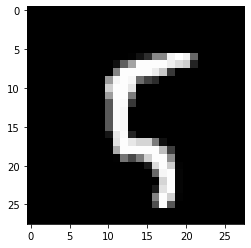

In [21]:
import matplotlib.pyplot as plt

p = mnist.data.iloc[100].values.reshape(28,28)
plt.imshow(p,cmap='gray')
print(mnist.target[100])

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [25]:
hist = model.fit(X_train,y_train,epochs=10,batch_size=100,verbose=2)

2021-07-30 23:02:20.692930: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-30 23:02:20.694484: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Epoch 1/10
490/490 - 18s - loss: 99.8750 - accuracy: 0.8763
Epoch 2/10
490/490 - 17s - loss: 95.9608 - accuracy: 0.9574
Epoch 3/10
490/490 - 17s - loss: 112.0836 - accuracy: 0.9646
Epoch 4/10
490/490 - 17s - loss: 120.9757 - accuracy: 0.9711
Epoch 5/10
490/490 - 17s - loss: 103.1173 - accuracy: 0.9756
Epoch 6/10
490/490 - 17s - loss: 203.7091 - accuracy: 0.9717
Epoch 7/10
490/490 - 17s - loss: 298.8549 - accuracy: 0.9753
Epoch 8/10
490/490 - 17s - loss: 409.9727 - accuracy: 0.9770
Epoch 9/10
490/490 - 17s - loss: 557.1063 - accuracy: 0.9788
Epoch 10/10
490/490 - 17s - loss: 856.5087 - accuracy: 0.9800


In [26]:
hist.history['accuracy']

[0.87628573179245,
 0.9574285745620728,
 0.9646326303482056,
 0.9710816144943237,
 0.9755918383598328,
 0.9716938734054565,
 0.9753469228744507,
 0.9769591689109802,
 0.9787551164627075,
 0.9799591898918152]

In [27]:
hist.history['loss']

[99.875,
 95.96078491210938,
 112.08362579345703,
 120.9756851196289,
 103.11732482910156,
 203.70912170410156,
 298.8548889160156,
 409.9726867675781,
 557.1062622070312,
 856.5086669921875]

In [28]:
loss , acc = model.evaluate(X_test,y_test)
print('손실값 :',round(loss,3))
print('정확도 :',round(acc,3))

657/657 [==============================] - 3s 4ms/step - loss: 943.7435 - accuracy: 0.9830
손실값 : 943.744
정확도 : 0.983


In [29]:
y_pred_class= model.predict_classes(X_test)
print(y_pred_class[0:3])

/Users/song-go-eun/miniforge3/envs/tf24/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[6 2 7]


In [30]:
import keras.datasets as d
import tensorflow as tf

In [31]:
fmnist = tf.keras.datasets.fashion_mnist

In [32]:
(X_train,y_train),(X_test,y_test)=fmnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
y_train.shape

(60000,)

In [35]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

[9 0 0]


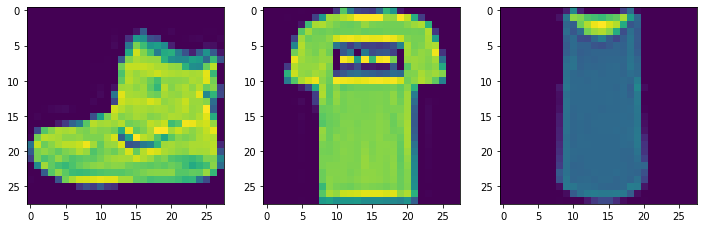

In [37]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(X_train[0])

plt.subplot(1,3,2)
plt.imshow(X_train[1])

plt.subplot(1,3,3)
plt.imshow(X_train[2])

print(y_train[:3])

In [38]:
X_train = X_train[:,:,:,np.newaxis]
X_test = X_test[:,:,:,np.newaxis]

In [39]:
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [40]:
y_train = to_categorical(y_train,10)

In [41]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),padding='Same',activation='relu',input_shape=[28,28,1]))
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))

In [42]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [43]:
hist = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 1.6660 - accuracy: 0.7280
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5293 - accuracy: 0.8494
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4887 - accuracy: 0.8626
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5943 - accuracy: 0.8627
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5214 - accuracy: 0.8747
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4730 - accuracy: 0.8845
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6040 - accuracy: 0.8824
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.3026 - accuracy: 0.8710
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.7368 - accuracy: 0.8733
Epoch 10/10
1875/1875 [==============================] - 23s 12m

In [44]:
y_test = to_categorical(y_test,10)
loss , acc = model.evaluate(X_test,y_test)
print('손실값 :',round(loss,3))
print('정확도 :',round(acc,3))

313/313 [==============================] - 1s 4ms/step - loss: 4.3157 - accuracy: 0.8832
손실값 : 4.316
정확도 : 0.883


In [45]:
y_pred = np.argmax(model.predict(X_test[100:103]),axis=1)
print(y_pred)

[3 6 7]
